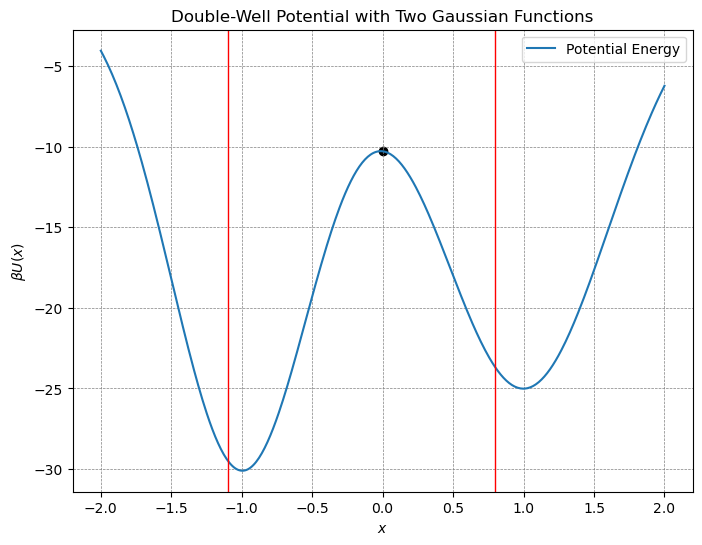

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve
from scipy.integrate import quad
from scipy.interpolate import interp1d, PchipInterpolator, CubicSpline

# Define the double-well potential using two Gaussian functions
# def double_gaussian_potential(x, A1=3, mu1=-1, sigma1=0.5, A2=4, mu2=1, sigma2=0.6):
def double_gaussian_potential(x, A1=30, mu1=-1, sigma1=0.5, A2=25, mu2=1, sigma2=0.6):
    V1 = A1 * np.exp(-((x - mu1)**2) / (2 * sigma1**2))
    V2 = A2 * np.exp(-((x - mu2)**2) / (2 * sigma2**2))
    return -(V1 + V2)
beta_U = double_gaussian_potential

D0 = 0.01
def D(x):
    # return D0*x**(2/3)
    return D0*x**0
x = np.linspace(-2, 2, 400)

# Plot the potential
plt.figure(figsize=(8, 6))
plt.plot(x, beta_U(x), label='Potential Energy')
plt.title('Double-Well Potential with Two Gaussian Functions')
plt.xlabel('$x$')
plt.ylabel(r'$\beta U(x)$')
# plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0.8, color='red',linewidth=1)
plt.axvline(-1.1, color='red',linewidth=1)
plt.scatter(0, beta_U(0), color='black')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

In [2]:
a = 0.1   # location of Injecting point
b1 = -1.1  # location of lower absorbing boundary
b2 = 1.1   # location of upper absorbing boundary
h = 0.01
N = int((b2-b1)/h+1)
x_arr = np.linspace(b1, b2, N)
re_inject_idx = np.where(np.round(x_arr, decimals=10) == a)[0][0]

N1 = int((a-b1)/h+1)
N2 = int((b2-a)/h+1)
x1_arr = np.linspace(b1, a, N1)
x2_arr = np.linspace(a, b2, N2)

In [3]:
from transfer_matrix_recycle import TransferMatrix_AbInAb
from transfer_matrix_reptile import TransferMatrix_InReAb, TransferMatrix_AbReIn

aia_trans = TransferMatrix_AbInAb(h, x_arr, beta_U, recycle_idx=re_inject_idx, criteria=0)

ari1_trans = TransferMatrix_AbReIn(h, x1_arr, beta_U, 0)
ira2_trans = TransferMatrix_InReAb(h, x2_arr, beta_U, 0)

from mfpt_Pst_RW_binaryTree_simu import simulate_AbInAb_regular, synthesize_trajectories
num_particles = 2000
init_position = a
hx = h
ht = hx**2/(2*D0)
n_arr = np.arange(b1, b2+h/2, h)
n_arr = np.round(n_arr, decimals=8)

In [4]:
%%time

count_left, count_right, ti_left, ti_right, left_iter_count_arr, right_iter_count_arr = simulate_AbInAb_regular(init_point=init_position, num_particles=num_particles, beta_U=beta_U, n_arr=n_arr, b1=b1, b2=b2, hx=hx)

CPU times: user 13.7 s, sys: 3.82 ms, total: 13.7 s
Wall time: 13.8 s


In [5]:
[count_left.shape, count_right.shape, ti_left.shape, ti_right.shape, left_iter_count_arr.shape, right_iter_count_arr.shape]

[(2000, 121), (2000, 101), (2000, 121), (2000, 101), (2000,), (2000,)]

In [6]:
np.sum(count_left[:,0])

353.0

In [7]:
np.sum(count_right[:,-1])

1647.0

In [8]:
np.sum(ti_left[:, 0] == 0)

1647

In [9]:
ti_right[:,-1][:200]

array([1748., 2232., 1147., 1699., 2018., 1377., 2225., 1003., 1341.,
       1299., 1403., 3061.,    0., 1001.,    0., 2938., 2432., 2660.,
       1725., 1117., 1255.,    0.,    0., 1304., 1393., 1474.,  596.,
       1294., 1377., 1535., 1786.,    0., 2741., 1267.,    0.,  906.,
        733.,    0., 2738.,  581., 2264.,    0., 1194.,  997.,    0.,
          0., 1542., 1700.,  605., 1824., 1825.,    0.,  939., 1347.,
       1306., 2263.,  842., 1578., 1693.,  626., 1473., 1910., 1044.,
        674., 2378., 1419., 1306.,    0., 1298., 1478., 2508.,    0.,
       1765., 2001., 1965., 1471., 2155., 2967., 1200., 3799., 2559.,
       1066., 1431., 1913.,    0., 1134.,    0., 2666., 2366.,    0.,
       1508.,  830., 1244.,  781.,    0.,    0., 1197.,    0.,    0.,
       3737.,    0.,  769., 1825.,  708., 1095., 1826., 2396.,    0.,
        955., 1375.,    0.,    0., 1526., 1357., 1388., 1241., 1844.,
       2009., 1395.,  756., 1985., 1994., 1182., 5299., 3984., 1507.,
       1192., 1499.,

In [10]:
left_iter_count_arr

array([372., 125.,  33., ...,  36., 368.,  43.])

In [11]:
right_iter_count_arr

array([1748., 2232., 1147., ..., 3082., 1736., 1082.])

In [12]:


harvest_count_n1, harvest_count_n2, harvest_fpt_n1, harvest_fpt_n2 = synthesize_trajectories(count_left, count_right, ti_left, ti_right, left_iter_count_arr, right_iter_count_arr)

In [13]:
harvest_count_n1.shape, harvest_count_n2.shape, harvest_fpt_n1.shape, harvest_fpt_n2.shape

((1996, 121), (2000, 101), (1996, 121), (2000, 101))

In [14]:
harvest_count_n1

array([[  1.,   4.,  10., ..., 217., 239., 249.],
       [  1.,   4.,  10., ..., 204., 229., 241.],
       [  1.,   4.,  10., ..., 172., 193., 210.],
       ...,
       [  1.,   1.,   3., ...,  48.,  53.,  56.],
       [  1.,   1.,   3., ...,  30.,  35.,  34.],
       [  1.,   1.,   3., ...,  23.,  28.,  25.]])

In [15]:
harvest_fpt_n1

array([[3.445e+03, 3.338e+03, 3.325e+03, ..., 8.000e+00, 4.000e+00,
        1.814e+03],
       [3.073e+03, 2.966e+03, 2.953e+03, ..., 3.000e+00, 2.000e+00,
        1.442e+03],
       [2.948e+03, 2.841e+03, 2.828e+03, ..., 2.000e+00, 1.000e+00,
        1.317e+03],
       ...,
       [1.382e+03, 1.381e+03, 1.373e+03, ..., 8.000e+00, 2.000e+00,
        2.440e+02],
       [1.163e+03, 1.162e+03, 1.154e+03, ..., 7.000e+00, 3.000e+00,
        2.500e+01],
       [1.138e+03, 1.137e+03, 1.129e+03, ..., 8.000e+00, 2.000e+00,
        0.000e+00]])

In [16]:
count_n_left = harvest_count_n1
count_n_right = harvest_count_n2
ti_n_left =  harvest_fpt_n1
ti_n_right = harvest_fpt_n2

In [17]:
# np.save('data/count_n_high', count_n)
# np.save('data/ti_n_high', ti_n)

1996.0 2000.0


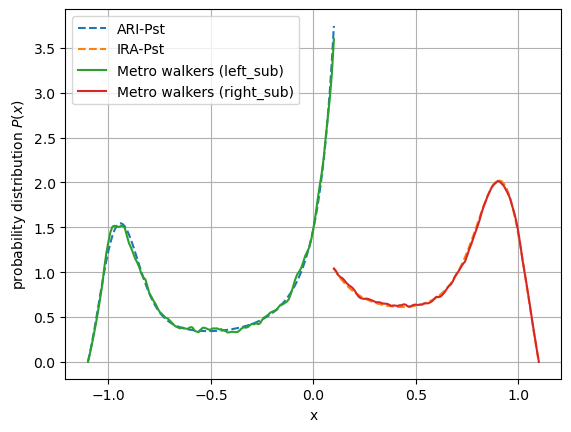

In [18]:
ari1_trans.steady_state[0] = 0
ira2_trans.steady_state[-1] = 0
ari1_trans.steady_state = ari1_trans.steady_state/(h*np.sum(ari1_trans.steady_state))
ira2_trans.steady_state = ira2_trans.steady_state/(h*np.sum(ira2_trans.steady_state))
plt.plot(x1_arr, ari1_trans.steady_state, '--', label="ARI-Pst")
plt.plot(x2_arr, ira2_trans.steady_state, '--', label="IRA-Pst")

n1_arr = n_arr[:N1]
n2_arr = n_arr[N1-1:]
count_n1 = np.sum(count_n_left, axis=0)
count_n2 = np.sum(count_n_right, axis=0)
print(count_n1[0], count_n2[-1])

count_n1[0] = 0
count_n2[-1] = 0
Pst_n1 = count_n1/(h*np.sum(count_n1))
Pst_n2 = count_n2/(h*np.sum(count_n2))
plt.plot(n1_arr, Pst_n1, label="Metro walkers (left_sub)")
plt.plot(n2_arr, Pst_n2, label="Metro walkers (right_sub)")

plt.xlabel('x')
plt.ylabel("probability distribution $P(x)$")
plt.legend()
plt.grid()
# plt.savefig("graphs/high_barrier_Pst.pdf", format='pdf')
# 3671.0 1041.0

In [19]:
Pst_n1-ari1_trans.steady_state

array([ 0.        , -0.00815394, -0.01752211, -0.02660994, -0.03651237,
       -0.03738656, -0.03610279, -0.01975074,  0.04206685,  0.08493909,
        0.10098456,  0.11652584,  0.09753627,  0.04539552, -0.00702787,
       -0.03607779, -0.03165805, -0.01878727, -0.01937923, -0.06401024,
       -0.09550672, -0.08638774, -0.07986199, -0.07135441, -0.04174151,
       -0.02265075, -0.0212959 ,  0.00022022,  0.04598143,  0.02853057,
        0.00340024,  0.01547418,  0.01799211,  0.02520235,  0.01363196,
        0.00487466,  0.01242315,  0.01308066,  0.01543563,  0.02418913,
        0.019329  ,  0.00744166, -0.00456802, -0.01006076, -0.01113331,
       -0.0118487 ,  0.00545312,  0.00356678,  0.00160101,  0.00984838,
        0.02934453,  0.02935048, -0.00256451, -0.01214391, -0.01577963,
        0.0132096 ,  0.03624969,  0.03567165,  0.02705746,  0.01562407,
        0.01804384,  0.0295866 ,  0.02678037,  0.02745721,  0.01434859,
        0.01466414,  0.0002101 , -0.00855174, -0.0289903 , -0.03

/tmp/ipykernel_1027112/3554627992.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(x1_arr, -np.log(Pst_n1), label='Metro walkers (left_sub)')
/tmp/ipykernel_1027112/3554627992.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(x2_arr, -np.log(Pst_n2), label='Metro walkers (right_sub)')
/tmp/ipykernel_1027112/3554627992.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(x1_arr, -np.log(ari1_trans.steady_state),'--', label="ARI-Pst")
/tmp/ipykernel_1027112/3554627992.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(x2_arr, -np.log(ira2_trans.steady_state), '--', label="IRA-Pst")


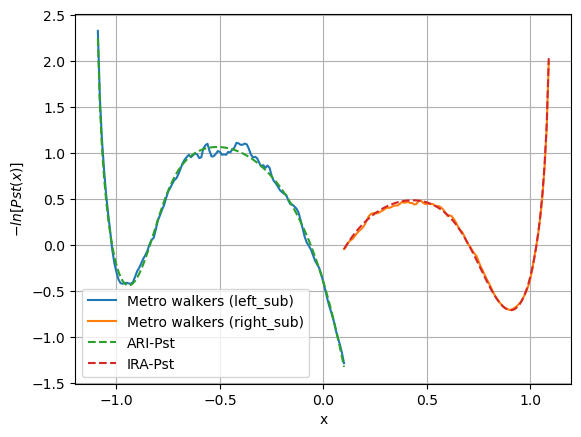

In [20]:
plt.plot(x1_arr, -np.log(Pst_n1), label='Metro walkers (left_sub)')
plt.plot(x2_arr, -np.log(Pst_n2), label='Metro walkers (right_sub)')
plt.plot(x1_arr, -np.log(ari1_trans.steady_state),'--', label="ARI-Pst")
plt.plot(x2_arr, -np.log(ira2_trans.steady_state), '--', label="IRA-Pst")
plt.xlabel('x')
plt.ylabel("$-ln[Pst(x)]$")
plt.grid()
plt.legend()

[ 7.86255592e-02  1.42715653e-01  1.15695051e-01  1.37624574e-01
  2.03218284e-02 -1.41867356e-02  2.00828107e-02 -6.90508950e-02
 -3.64680057e-02 -4.79671135e-02 -1.57916867e-02  3.09299761e-03
  3.16290825e-02  5.51507878e-02  2.27004795e-02  2.15375600e-02
  1.67473538e-02  3.49415452e-02  5.93506031e-02  6.77442208e-02
  8.11412098e-02  8.82265901e-02  9.38279071e-02  7.44344977e-02
  7.75660282e-02  6.38431733e-02  4.45937377e-02  4.22939294e-02
  5.37121052e-02  5.48783095e-02  4.94753550e-02  5.49751426e-02
  3.54456100e-02  3.45128122e-02  4.56475000e-02  6.30227115e-02
  5.56703533e-02  4.80104333e-02  4.04979506e-02  3.93729228e-02
  4.67861077e-02  4.66210679e-02  4.30416435e-02  4.04847804e-02
  4.15942095e-02  4.70053021e-02  4.31434321e-02  4.92382519e-02
  4.66826442e-02  3.95690186e-02  3.53583671e-02  3.42166502e-02
  4.35540902e-02  3.35564519e-02  3.03115217e-02  2.83318928e-02
  1.00612490e-03  6.79645270e-05  1.25297127e-03  4.76480323e-03
 -9.07558254e-03 -1.10168

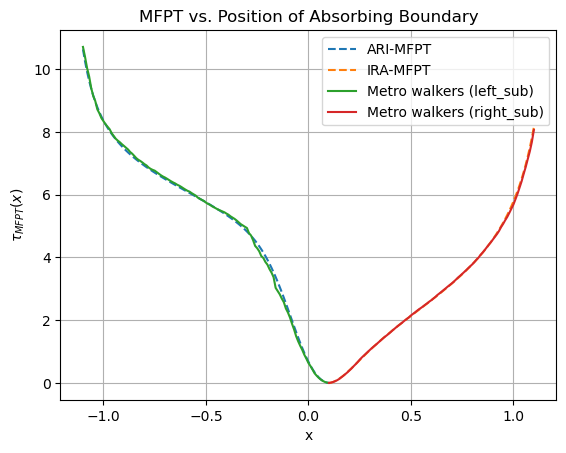

In [21]:
def mfpt_matrix(transMat_instance):
    ria_trans = transMat_instance
    ria_P = ria_trans.trans_mat.T
    idx_fixed_vect = np.where(np.round(ria_trans.eig6_w.real, decimals=10) == 1)[0][0]
    vec_pi = ria_trans.eig6_v[:,idx_fixed_vect].real/np.sum(ria_trans.eig6_v[:,idx_fixed_vect].real)
    N = vec_pi.size
    epsilon = np.ones(N)
    mat_I = np.eye(N)
    mat_E = np.ones((N, N))
    mat_Z = np.linalg.inv(mat_I-ria_P+np.outer(epsilon, vec_pi))
    vec_Zdg = np.diag(mat_Z)
    mat_Zdg = np.diag(vec_Zdg)
    mat_Mdg = np.diag(1/vec_pi)
    mat_M = (mat_I - mat_Z + mat_E @ mat_Zdg) @ mat_Mdg
    mat_Mbar = mat_M - mat_Mdg
    return mat_Mbar

m1_bar = mfpt_matrix(ari1_trans)
m2_bar = mfpt_matrix(ira2_trans)
delt_t = h**2/(2*D0)
plt.plot(x1_arr, delt_t*m1_bar[-1], '--', label="ARI-MFPT")
plt.plot(x2_arr, delt_t*m2_bar[0], '--', label="IRA-MFPT")

# Convert ti_left to float type
ti_n1 = ti_n_left.astype(float)
# Replace 0 elements with NaN
# ti_left[ti_left == 0] = np.nan
ti_n1[:, -1] = 0

# Convert ti_left to float type
ti_n2 = ti_n_right.astype(float)
# Replace 0 elements with NaN
# ti_right[ti_right == 0] = np.nan
ti_n2[:, 0] = 0

mfpt1_simu_arr = ht*np.nanmean(ti_n1, axis=0)
mfpt2_simu_arr = ht*np.nanmean(ti_n2, axis=0)

plt.plot(n1_arr, mfpt1_simu_arr, label="Metro walkers (left_sub)")
plt.plot(n2_arr, mfpt2_simu_arr, label="Metro walkers (right_sub)")

plt.xlabel('x')
plt.ylabel(r"$\tau_{MFPT} (x)$")
plt.title('MFPT vs. Position of Absorbing Boundary')
plt.legend()
plt.grid()
# plt.savefig("graphs/high_barrier_MFPT.pdf", format='pdf')

print(mfpt1_simu_arr-delt_t*m1_bar[-1])


### Define Functions for Reconstructing Free Energy with MFPT and steady state distribution

In [22]:
def reconstruct_energy_ra(x_arr, Pst_arr, mfpt_arr):
    # Pst_arr[-1] = 0
    interp_Pst_func = CubicSpline(x_arr, np.array(Pst_arr, dtype=float))
    N = x_arr.size
    # Except for the absorbing boundary Pst(b) = 0, D(x)=0, also avoid at reflecting boundary A(x)=0, B(x)=0
    Bx_arr = np.zeros(N-2)
    integral_Pst_arr = np.zeros(N-2)
    for i in range(N-2):
        integral_Pst_arr[i], _ = quad(interp_Pst_func, x_arr[1+i], x_arr[-1])
        Bx_arr[i] = -1.0/interp_Pst_func(x_arr[1+i])*(integral_Pst_arr[i]-(mfpt_arr[-1]-mfpt_arr[1+i])/mfpt_arr[-1])

    interp_invertBx_func = CubicSpline(x_arr[1:-1], 1.0/Bx_arr)
    integral_invertBx_arr = np.zeros(N-2)
    beta_Grec2_arr = np.zeros(N-2)
    for i in range(N-2):
        # Here x0 is x_arr[1]
        integral_invertBx_arr[i], _ = quad(interp_invertBx_func, x_arr[1], x_arr[1+i])
        beta_Grec2_arr[i] = beta_U(x_arr[1])+np.log(Bx_arr[i]/Bx_arr[0])-integral_invertBx_arr[i]
    return beta_Grec2_arr

def reconstruct_energy_ar(x_arr, Pst_arr, mfpt_arr):
    # Pst_arr[0] = 0
    interp_Pst_func = CubicSpline(x_arr, np.array(Pst_arr, dtype=float))
    N = x_arr.size
    # Except for the absorbing boundary Pst(b) = 0, D(x)=0, also avoid at reflecting boundary A(x)=0, B(x)=0
    Bx_arr = np.zeros(N-2)
    integral_Pst_arr = np.zeros(N-2)
    for i in range(N-2):
        integral_Pst_arr[i], _ = quad(interp_Pst_func, x_arr[0], x_arr[1+i])
        Bx_arr[i] = -1.0/interp_Pst_func(x_arr[1+i])*(integral_Pst_arr[i]+(mfpt_arr[1+i]-mfpt_arr[0])/mfpt_arr[0])

    interp_invertBx_func = CubicSpline(x_arr[1:-1], 1.0/Bx_arr)
    integral_invertBx_arr = np.zeros(N-2)
    beta_Grec2_arr = np.zeros(N-2)
    for i in range(N-2):
        # Here x0 is x_arr[1]
        integral_invertBx_arr[i], _ = quad(interp_invertBx_func, x_arr[1+i], x_arr[-2])
        beta_Grec2_arr[i] = beta_U(x_arr[-2])+np.log(Bx_arr[i]/Bx_arr[-1])-integral_invertBx_arr[i]
    return beta_Grec2_arr

### Reconstruction Using data [mfpt (mfpt1_simu_arr), Pst (Pst_n)] extracted from simulation

/tmp/ipykernel_1027112/2877723197.py:29: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_Pst_arr[i], _ = quad(interp_Pst_func, x_arr[0], x_arr[1+i])
/tmp/ipykernel_1027112/2877723197.py:37: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on th

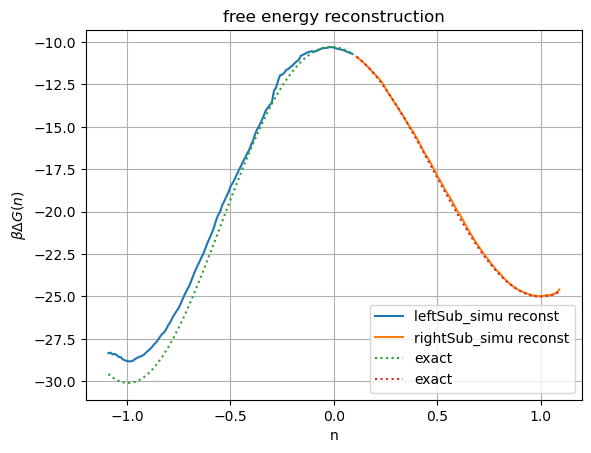

In [23]:
# np.append(delt_t*m1_bar[-1][0], mfpt1_simu_arr[1:])
beta_Grec2_arr1 = reconstruct_energy_ar(n1_arr, Pst_arr=Pst_n1, mfpt_arr=mfpt1_simu_arr)
beta_Grec2_arr2 = reconstruct_energy_ra(n2_arr, Pst_arr=Pst_n2, mfpt_arr=mfpt2_simu_arr)
# beta_Grec2_arr1 = reconstruct_energy_ar(n1_arr, Pst_arr=Pst_n1, mfpt_arr=m1_bar[-1])
# beta_Grec2_arr2 = reconstruct_energy_ra(n2_arr, Pst_arr=Pst_n2, mfpt_arr=m2_bar[0])
# beta_Grec2_arr1 = reconstruct_energy_ar(n1_arr, Pst_arr=ari1_trans.steady_state, mfpt_arr=mfpt1_simu_arr)
# beta_Grec2_arr2 = reconstruct_energy_ra(n2_arr, Pst_arr=ira2_trans.steady_state, mfpt_arr=mfpt2_simu_arr)
# print(Pst_n1[0], Pst_n2[-1], hx*np.sum(Pst_n1), hx*np.sum(Pst_n2))
plt.plot(n1_arr[1:-1], beta_Grec2_arr1, label="leftSub_simu reconst")
plt.plot(n2_arr[1:-1], beta_Grec2_arr2, label="rightSub_simu reconst")
plt.plot(x1_arr[1:-1], beta_U(x1_arr[1:-1]), ':', label="exact")
plt.plot(x2_arr[1:-1], beta_U(x2_arr[1:-1]), ':', label="exact")

# Plot formatting
plt.xlabel('n')
plt.ylabel('$ \\beta \Delta G(n) $')
plt.title('free energy reconstruction')
plt.legend()
plt.grid()
# plt.savefig("graphs/high_barrier_reconstruction.pdf", format='pdf')

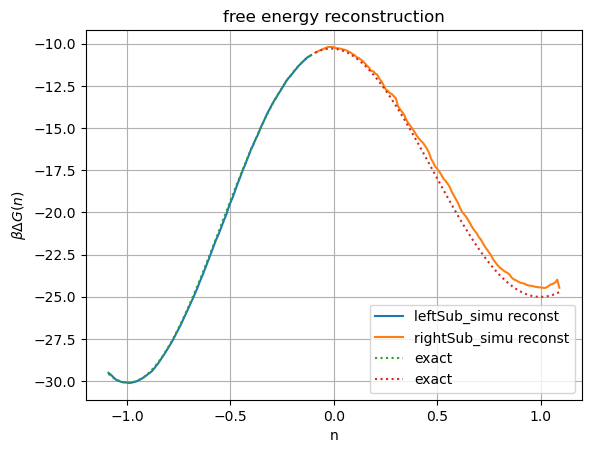

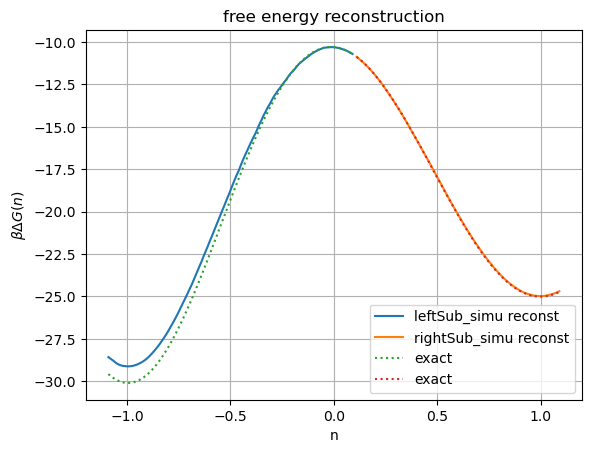

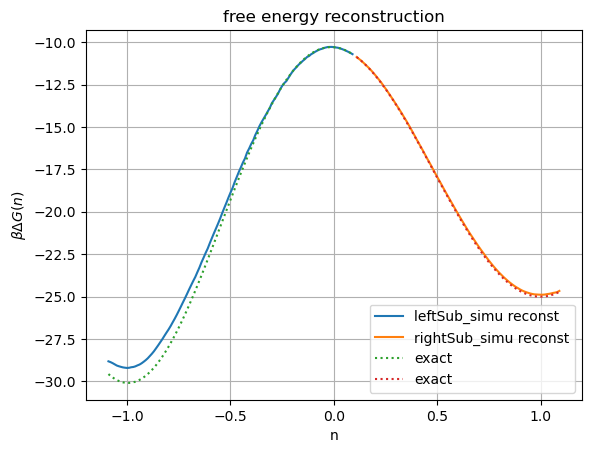

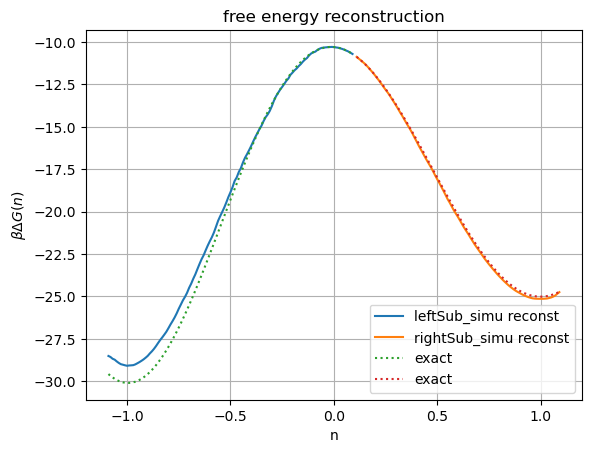

### Reconstruction Using data [mfpt matrix (mat_Mbar[i]), Pst (ria_trans.steady_state)] calculated by Transfer Matrix

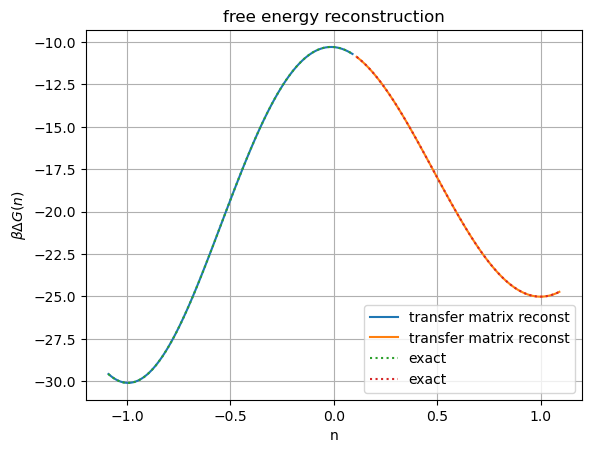

In [24]:
beta_Grec2_arr1 = reconstruct_energy_ar(x1_arr, Pst_arr=ari1_trans.steady_state, mfpt_arr=m1_bar[-1])
beta_Grec2_arr2 = reconstruct_energy_ra(x2_arr, Pst_arr=ira2_trans.steady_state, mfpt_arr=m2_bar[0])

plt.plot(x1_arr[1:-1], beta_Grec2_arr1, label="transfer matrix reconst")
plt.plot(x2_arr[1:-1], beta_Grec2_arr2, label="transfer matrix reconst")

plt.plot(x1_arr[1:-1], beta_U(x1_arr[1:-1]), ':', label="exact")
plt.plot(x2_arr[1:-1], beta_U(x2_arr[1:-1]), ':', label="exact")

# Plot formatting
plt.xlabel('n')
plt.ylabel('$ \\beta \Delta G(n) $')
plt.title('free energy reconstruction')
plt.legend()
plt.grid()